### Lab | Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('learningSet.csv', low_memory=False)

In [3]:
print(data.shape)
data.head()

(95412, 481)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

1. Check for null values in the numerical columns.


In [4]:
numerical = data.select_dtypes(np.number)
numerical.head()
print(numerical.shape)

(95412, 407)


In [5]:
numerical.dtypes

ODATEDW       int64
TCODE         int64
DOB           int64
AGE         float64
NUMCHLD     float64
             ...   
TARGET_B      int64
TARGET_D    float64
HPHONE_D      int64
RFA_2F        int64
CLUSTER2    float64
Length: 407, dtype: object

In [6]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,NUMCHLD,83026
5,INCOME,21286
6,WEALTH1,44732
8,MBCRAFT,52854
...,...,...
386,RAMNT_23,87553
387,RAMNT_24,77674
398,NEXTDATE,9973
399,TIMELAG,9973


In [7]:
numerical.isna().sum()/len(numerical)*100

ODATEDW      0.000000
TCODE        0.000000
DOB          0.000000
AGE         24.802960
NUMCHLD     87.018404
              ...    
TARGET_B     0.000000
TARGET_D     0.000000
HPHONE_D     0.000000
RFA_2F       0.000000
CLUSTER2     0.138347
Length: 407, dtype: float64

In [8]:
missing_perc = numerical.isna().sum()/len(numerical)*100
cols_above_25 = missing_perc[missing_perc > 25].index.tolist()
cols_above_25

['NUMCHLD',
 'WEALTH1',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'WEALTH2',
 'ADATE_5',
 'ADATE_10',
 'ADATE_13',
 'ADATE_15',
 'ADATE_17',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_8',
 'RAMNT_9',
 'RAMNT_10',
 'RAMNT_11',
 'RAMNT_12',
 'RAMNT_13',
 'RAMNT_14',
 'RAMNT_15',
 'RAMNT_16',
 'RAMNT_17',
 'RAMNT_18',
 'RAMNT_19',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_22',
 'RAMNT_23',
 'RAMNT_24']

2. Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
3. Use appropriate EDA technique where ever necessary.

The GEOCODE2 variable was not found in the database provided, so its analysis was not performed.

In [9]:
numerical['WEALTH1'].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

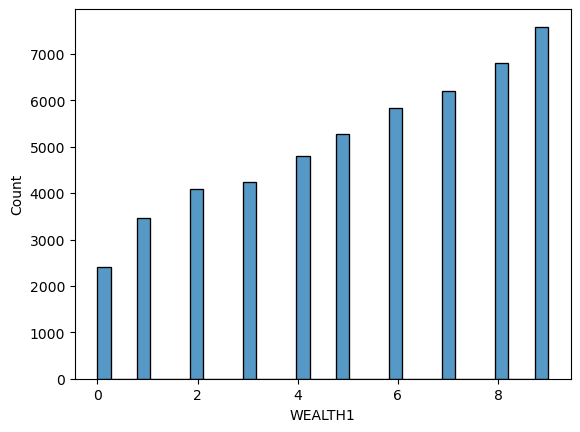

In [10]:
sns.histplot(numerical[numerical['WEALTH1'].notna()]['WEALTH1']) 
plt.show()

In the case of the WEALTH1 variable, the percentage of null values is 47%, so replacing the null values with the most representative category would only imbalance the data, so it is considered better to eliminate the null values.

In [11]:
ml = list(numerical[numerical['WEALTH1'].notna()].index)
numerical = numerical.loc[ml,:]

In [12]:
numerical['WEALTH1'].value_counts(dropna=False)

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

In [13]:
numerical['WEALTH1'].unique()

array([9., 1., 4., 2., 6., 0., 5., 8., 3., 7.])

ADI, DMA and MSA are variables that reflect characteristics of the donors neighborhood, as collected from the 1990 US Census: MSA Code, ADI Code and DMA Code. I do an exploratory analysis of the three variables and observe the following:

In [14]:
numerical['ADI'].value_counts(dropna=False)

13.0     3345
51.0     2628
65.0     1910
57.0     1537
197.0    1284
         ... 
601.0       1
139.0       1
145.0       1
161.0       1
140.0       1
Name: ADI, Length: 201, dtype: int64

In [15]:
numerical['ADI'].unique()

array([ 13., 281.,  67., 127.,  91., 251., 391., 269.,  83., 107., 291.,
        57., 329.,  55.,  73., 159., 201.,  75., 203., 105., 111., 173.,
       351., 109., 197., 279., 645., 361., 113., 131., 199., 187., 129.,
       441., 209., 235.,  39., 335., 577., 439., 455., 383., 249., 263.,
         0., 427., 185.,  15., 245.,  51., 175.,  59., 119., 233., 273.,
       325., 371., 377.,  89., 181., 342., 421., 219.,  65., 283., 339.,
       417., 299., 271.,  87., 451., 315., 157.,  71., 363., 367., 275.,
       403.,  77., 448., 217., 221., 165., 393., 207., 277., 319., 353.,
       247., 241., 307.,  69., 323., 213., 381., 179., 389., 331., 337.,
       457., 301., 359.,  17.,  53., 321., 327., 257., 413., 469., 303.,
       205., 412.,  63., 405., 373., 133., 211., 229., 243., 227.,  61.,
       425., 253., 313., 423., 433.,  85., 215.,  93., 115., 409., 445.,
       459., 177., 415., 449., 379., 237., 355., 255., 437., 419.,  19.,
       195., 467., 305.,  nan, 435., 621., 295., 47

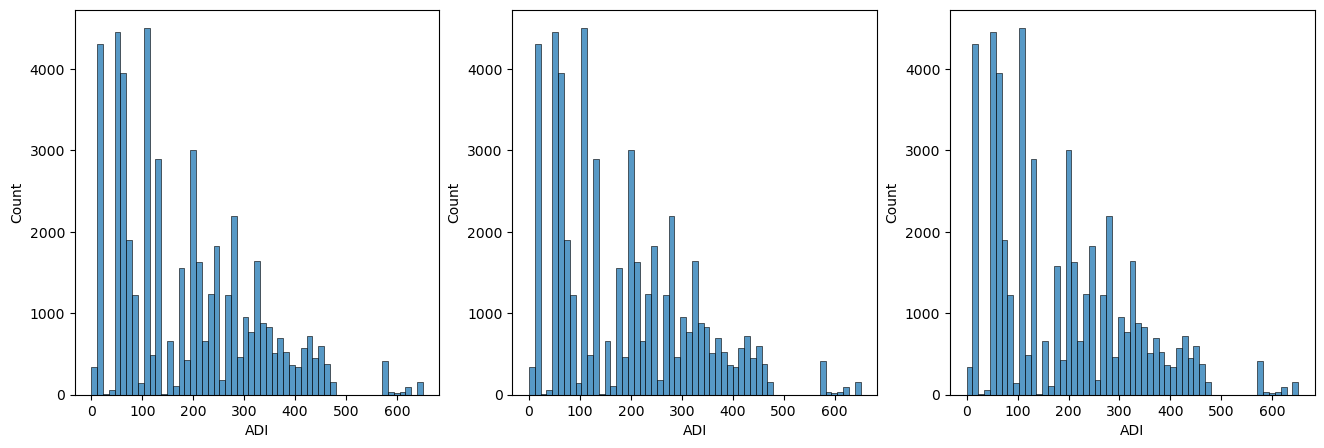

In [16]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(numerical['ADI'], ax = ax[0])
sns.histplot(numerical['ADI'].fillna(np.mean(numerical[numerical['ADI'].notna()]['ADI'])), ax = ax[1])
sns.histplot(numerical['ADI'].fillna(np.median(numerical[numerical['ADI'].notna()]['ADI'])),ax = ax[2])
plt.show()
numerical['ADI'] = numerical['ADI'].fillna(np.median(numerical['ADI']))

In [17]:
numerical['DMA'].value_counts(dropna=False)

803.0    3345
602.0    2630
807.0    1910
505.0    1538
524.0    1285
         ... 
598.0       1
538.0       1
502.0       1
552.0       1
549.0       1
Name: DMA, Length: 202, dtype: int64

In [18]:
numerical['DMA'].unique()

array([803., 518., 862., 528., 509., 643., 624., 671., 527., 613., 770.,
       505., 534., 547., 800., 638., 618., 609., 635., 819., 617., 637.,
       560., 623., 524., 517., 539., 546., 669., 575., 632., 548., 662.,
       529., 801., 771., 561., 804., 633., 839., 686., 716., 650., 743.,
       619., 691., 825., 622., 602., 675., 563., 610., 820., 749., 670.,
       765., 711., 868., 659., 762., 520., 503., 807., 544., 810., 656.,
       755., 641., 581., 540., 658., 616., 866., 746., 790., 753., 634.,
       648., 647., 531., 630., 611., 724., 649., 789., 693., 545., 692.,
       751., 678., 828., 626., 709., 567., 676., 640., 725., 722., 881.,
       756., 652., 570., 855., 588., 612., 628., 564., 530., 764., 679.,
       625., 698., 513., 627., 718., 571., 541., 604., 657., 752., 717.,
       551., 507., 642., 605., 519., 744., 600., 582., 557., 515., 705.,
       522., 757., 811., 682., 606., 737., 710., 813., 550., 644., 651.,
       525., 511., 631., 736., 802.,   0.,  nan, 63

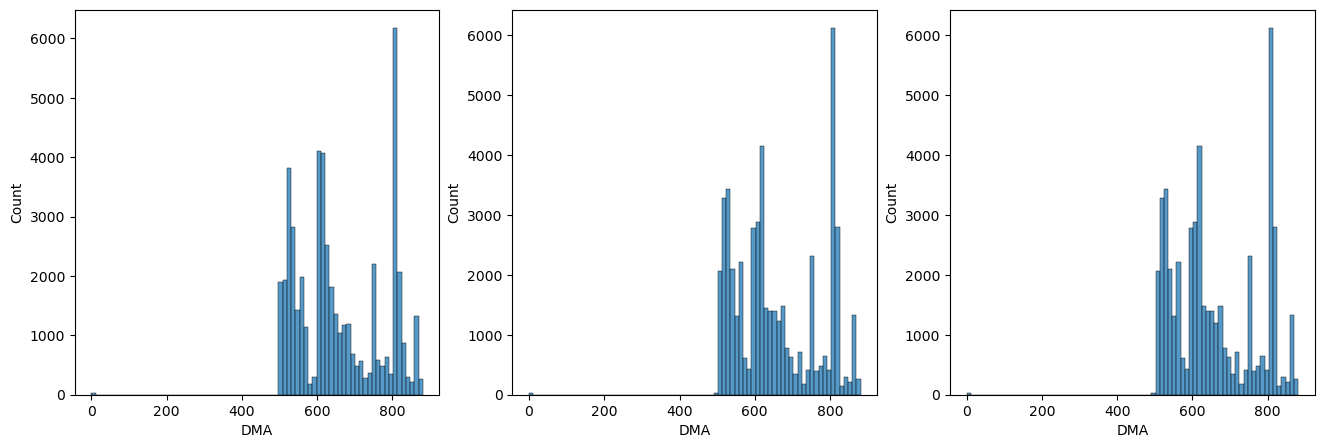

In [19]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(numerical['DMA'], ax = ax[0])
sns.histplot(numerical['DMA'].fillna(np.mean(numerical[numerical['DMA'].notna()]['DMA'])), ax = ax[1])
sns.histplot(numerical['DMA'].fillna(np.median(numerical[numerical['DMA'].notna()]['DMA'])),ax = ax[2])
plt.show()
numerical['DMA'] = numerical['DMA'].fillna(np.median(numerical['DMA']))

In [20]:
numerical['MSA'].value_counts(dropna=False)

0.0       9734
1600.0    2307
4480.0    2185
2160.0    1381
520.0     1108
          ... 
1303.0       1
5523.0       1
743.0        1
1480.0       1
7610.0       1
Name: MSA, Length: 288, dtype: int64

In [21]:
numerical['MSA'].unique()

array([4480.,    0., 9340., 5000., 3960., 3480., 2160., 5960., 5120.,
        440.,  680., 3360., 7040., 3120.,  640., 7600., 2680., 5080.,
       1360., 6640., 1145., 2800., 1520., 7510., 4720., 1920., 1560.,
       8960.,   40., 4520.,  520., 9360., 3600., 6780., 5800., 4120.,
       5160.,  760., 5880.,  380., 3440., 7320., 5560., 1600., 6120.,
       3000., 6880., 2020., 7080., 4080., 2580., 4100., 1620., 5360.,
        600., 4680., 5775., 8720., 7360., 9260., 2920., 7240., 3800.,
       2710., 8120., 5945., 2320., 3760., 2840.,  920.,  200.,  460.,
        320., 1400., 6440., 6920., 7400., 5790., 3660., 1000., 2520.,
       2440., 8520., 3720., 7500., 4400.,  840., 2080., 9040., 7485.,
       8750., 8735., 1150., 7160., 4920.,  880., 5920., 6200., 2655.,
       7720., 7480., 2330., 7680., 5200., 3400., 3605., 2750., 8240.,
       3080., 3150., 6660., 3980., 2120., 3810., 7840., 5240., 2240.,
       6690., 8280., 1760., 8780., 4200., 4900., 6580., 4280., 3160.,
       7640., 1720.,

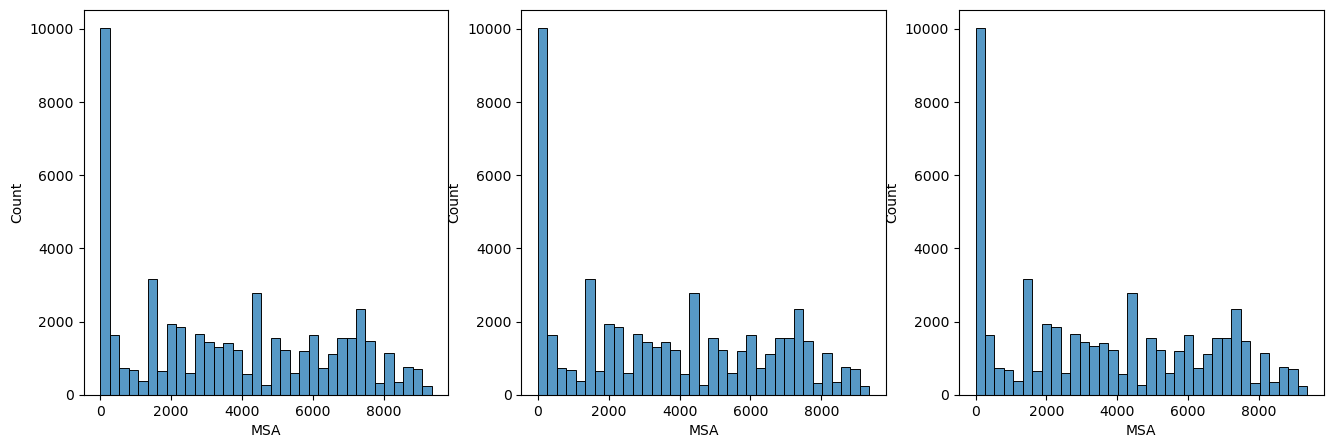

In [22]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(numerical['MSA'], ax = ax[0])
sns.histplot(numerical['MSA'].fillna(np.mean(numerical[numerical['MSA'].notna()]['MSA'])), ax = ax[1])
sns.histplot(numerical['MSA'].fillna(np.median(numerical[numerical['MSA'].notna()]['MSA'])),ax = ax[2])
plt.show()
numerical['MSA'] = numerical['MSA'].fillna(np.median(numerical['MSA']))

Based on what is observed in the histograms, the data has a similar distribution when applying the mean or median, but I choose the median because since it is a code that can be related to the location of donors, it must be an integer. So, I use a function to eliminate de NaN for every variable and after I check if the NaN values are not in the variable.

In [23]:
m = numerical['ADI'].median()
if pd.isna(m):
    m = 0
elif isinstance(m, float):
    m = float(m)
numerical['ADI'] = numerical['ADI'].fillna(m)

In [24]:
numerical['ADI'].unique()

array([ 13., 281.,  67., 127.,  91., 251., 391., 269.,  83., 107., 291.,
        57., 329.,  55.,  73., 159., 201.,  75., 203., 105., 111., 173.,
       351., 109., 197., 279., 645., 361., 113., 131., 199., 187., 129.,
       441., 209., 235.,  39., 335., 577., 439., 455., 383., 249., 263.,
         0., 427., 185.,  15., 245.,  51., 175.,  59., 119., 233., 273.,
       325., 371., 377.,  89., 181., 342., 421., 219.,  65., 283., 339.,
       417., 299., 271.,  87., 451., 315., 157.,  71., 363., 367., 275.,
       403.,  77., 448., 217., 221., 165., 393., 207., 277., 319., 353.,
       247., 241., 307.,  69., 323., 213., 381., 179., 389., 331., 337.,
       457., 301., 359.,  17.,  53., 321., 327., 257., 413., 469., 303.,
       205., 412.,  63., 405., 373., 133., 211., 229., 243., 227.,  61.,
       425., 253., 313., 423., 433.,  85., 215.,  93., 115., 409., 445.,
       459., 177., 415., 449., 379., 237., 355., 255., 437., 419.,  19.,
       195., 467., 305., 435., 621., 295., 473.,  1

In [25]:
m = numerical['DMA'].median()
if pd.isna(m):
    m = 0
elif isinstance(m, float):
    m = float(m)
numerical['DMA'] = numerical['DMA'].fillna(m)

In [26]:
numerical['DMA'].unique()

array([803., 518., 862., 528., 509., 643., 624., 671., 527., 613., 770.,
       505., 534., 547., 800., 638., 618., 609., 635., 819., 617., 637.,
       560., 623., 524., 517., 539., 546., 669., 575., 632., 548., 662.,
       529., 801., 771., 561., 804., 633., 839., 686., 716., 650., 743.,
       619., 691., 825., 622., 602., 675., 563., 610., 820., 749., 670.,
       765., 711., 868., 659., 762., 520., 503., 807., 544., 810., 656.,
       755., 641., 581., 540., 658., 616., 866., 746., 790., 753., 634.,
       648., 647., 531., 630., 611., 724., 649., 789., 693., 545., 692.,
       751., 678., 828., 626., 709., 567., 676., 640., 725., 722., 881.,
       756., 652., 570., 855., 588., 612., 628., 564., 530., 764., 679.,
       625., 698., 513., 627., 718., 571., 541., 604., 657., 752., 717.,
       551., 507., 642., 605., 519., 744., 600., 582., 557., 515., 705.,
       522., 757., 811., 682., 606., 737., 710., 813., 550., 644., 651.,
       525., 511., 631., 736., 802.,   0., 636., 59

In [27]:
m = numerical['MSA'].median()
if pd.isna(m):
    m = 0
elif isinstance(m, float):
    m = float(m)
numerical['MSA'] = numerical['MSA'].fillna(m)

In [28]:
numerical['MSA'].unique()

array([4480.,    0., 9340., 5000., 3960., 3480., 2160., 5960., 5120.,
        440.,  680., 3360., 7040., 3120.,  640., 7600., 2680., 5080.,
       1360., 6640., 1145., 2800., 1520., 7510., 4720., 1920., 1560.,
       8960.,   40., 4520.,  520., 9360., 3600., 6780., 5800., 4120.,
       5160.,  760., 5880.,  380., 3440., 7320., 5560., 1600., 6120.,
       3000., 6880., 2020., 7080., 4080., 2580., 4100., 1620., 5360.,
        600., 4680., 5775., 8720., 7360., 9260., 2920., 7240., 3800.,
       2710., 8120., 5945., 2320., 3760., 2840.,  920.,  200.,  460.,
        320., 1400., 6440., 6920., 7400., 5790., 3660., 1000., 2520.,
       2440., 8520., 3720., 7500., 4400.,  840., 2080., 9040., 7485.,
       8750., 8735., 1150., 7160., 4920.,  880., 5920., 6200., 2655.,
       7720., 7480., 2330., 7680., 5200., 3400., 3605., 2750., 8240.,
       3080., 3150., 6660., 3980., 2120., 3810., 7840., 5240., 2240.,
       6690., 8280., 1760., 8780., 4200., 4900., 6580., 4280., 3160.,
       7640., 1720.,


In the case of the numeric variables WEALTH1, ADI, DMA,and MSA, after cleaning the columns, we see that we go from 95,412 to 50,680 rows. The variable GEOCODE2 wasn't into database.

In [29]:
print(numerical.shape)
numerical.head()

(50680, 407)


,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9509.0,NaN,NaN,NaN,9503.0,NaN,NaN,9411.0,9411.0,9410.0,9409.0,NaN,9406.0,12,9702,32,6,13,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,NaN,NaN,NaN,9504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35